In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import models,layers,optimizers,losses,metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(train_data,train_labels),(test_data,test_labels) = keras.datasets.reuters.load_data(num_words=10000)

In [3]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [4]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [5]:
test_data[0]

[1,
 4,
 1378,
 2025,
 9,
 697,
 4622,
 111,
 8,
 25,
 109,
 29,
 3650,
 11,
 150,
 244,
 364,
 33,
 30,
 30,
 1398,
 333,
 6,
 2,
 159,
 9,
 1084,
 363,
 13,
 2,
 71,
 9,
 2,
 71,
 117,
 4,
 225,
 78,
 206,
 10,
 9,
 1214,
 8,
 4,
 270,
 5,
 2,
 7,
 748,
 48,
 9,
 2,
 7,
 207,
 1451,
 966,
 1864,
 793,
 97,
 133,
 336,
 7,
 4,
 493,
 98,
 273,
 104,
 284,
 25,
 39,
 338,
 22,
 905,
 220,
 3465,
 644,
 59,
 20,
 6,
 119,
 61,
 11,
 15,
 58,
 579,
 26,
 10,
 67,
 7,
 4,
 738,
 98,
 43,
 88,
 333,
 722,
 12,
 20,
 6,
 19,
 746,
 35,
 15,
 10,
 9,
 1214,
 855,
 129,
 783,
 21,
 4,
 2280,
 244,
 364,
 51,
 16,
 299,
 452,
 16,
 515,
 4,
 99,
 29,
 5,
 4,
 364,
 281,
 48,
 10,
 9,
 1214,
 23,
 644,
 47,
 20,
 324,
 27,
 56,
 2,
 2,
 5,
 192,
 510,
 17,
 12]

In [6]:
test_labels

array([ 3, 10,  1, ...,  3,  3, 24])

In [7]:
len(train_data)

8982

In [8]:
len(test_data)

2246

In [9]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
y_train = keras.utils.to_categorical(train_labels)
y_test = keras.utils.to_categorical(test_labels)

In [11]:
model = models.Sequential()
model.add(layers.Dense(64,activation=tf.nn.relu,input_shape=(10000,)))
model.add(layers.Dense(64,activation=tf.nn.relu,))
model.add(layers.Dense(46,activation=tf.nn.softmax))

In [12]:
model.compile(loss=losses.categorical_crossentropy,
              optimizer=optimizers.RMSprop(),
             metrics=['accuracy'])

In [13]:
x_val = x_train[:1000]
part_x_train = x_train[1000:]

y_val = y_train[:1000]
part_y_train = y_train[1000:]

In [15]:
history = model.fit(part_x_train,part_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 216us/sample - loss: 2.8193 - accuracy: 0.5199 - val_loss: 1.8654 - val_accuracy: 0.6400
Epoch 2/20
7982/7982 [==============================] - 1s 122us/sample - loss: 1.4698 - accuracy: 0.7068 - val_loss: 1.3075 - val_accuracy: 0.7250
Epoch 3/20
7982/7982 [==============================] - 1s 133us/sample - loss: 1.0451 - accuracy: 0.7803 - val_loss: 1.1276 - val_accuracy: 0.7600
Epoch 4/20
7982/7982 [==============================] - 1s 117us/sample - loss: 0.8128 - accuracy: 0.8290 - val_loss: 1.0168 - val_accuracy: 0.7810
Epoch 5/20
7982/7982 [==============================] - 1s 101us/sample - loss: 0.6468 - accuracy: 0.8653 - val_loss: 0.9528 - val_accuracy: 0.8000
Epoch 6/20
7982/7982 [==============================] - 1s 105us/sample - loss: 0.5177 - accuracy: 0.8911 - val_loss: 0.9144 - val_accuracy: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 107us

In [17]:
loss =history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1,21)

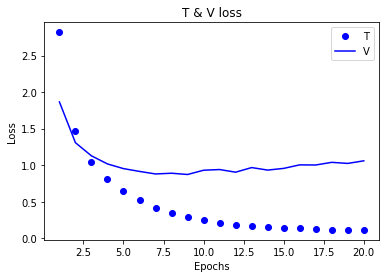

In [18]:
plt.plot(epochs,loss,'bo',label='T')
plt.plot(epochs,val_loss,'b',label='V')
plt.title('T & V loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()